# Import Libraries

In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy import stats
import plotly.express as px
import pickle
from pathlib import Path
from sklearn.model_selection import GridSearchCV


# Configuration

In [2]:
CONFIG = {
    "file_path": 'vgsales.csv',
    "random_state": 42,
    "test_size": 0.2,
    "features": ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'],
    "target": 'Global_Sales',
    "model_output_path": 'trained_model.pkl',
    "scaler_output_path": 'scaler.pkl'
}

# Load and Explore Data

In [3]:
def load_and_explore_data(config):
    file_path = config["file_path"]
    df = pd.read_csv(file_path, index_col=0)
    print("-" * 50)
    print(f"Number of rows and columns: {df.shape}")
    print("-" * 50)
    print("\nColumn names and data types:\n", df.dtypes)
    print("-" * 50)
    print("\nFirst 10 rows of the dataframe:\n", df.head(10))
    print("-" * 50)
    return df

df = load_and_explore_data(CONFIG)

--------------------------------------------------
Number of rows and columns: (16598, 10)
--------------------------------------------------

Column names and data types:
 Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object
--------------------------------------------------

First 10 rows of the dataframe:
                            Name Platform    Year         Genre Publisher  \
Rank                                                                       
1                    Wii Sports      Wii  2006.0        Sports  Nintendo   
2             Super Mario Bros.      NES  1985.0      Platform  Nintendo   
3                Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
4             Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
5      Pokemon Red/Pokemon Blue 

# Clean Data

In [4]:
def clean_data(df, random_state):
    df = df.copy()  # Create a copy to avoid chained assignment issues
    df.drop_duplicates(inplace=True)
    df['Year'] = df['Year'].fillna(df['Year'].median())
    df['Year'] = df['Year'].astype(int)
    df['Publisher'] = df['Publisher'].fillna('Unknown')
    print("\nMissing values after cleaning:\n", df.isnull().sum())
    print("-" * 50)
    print(f"\nNumber of rows and columns after cleaning: {df.shape}")
    print("-" * 50)
    return df

df = clean_data(df, CONFIG["random_state"])


Missing values after cleaning:
 Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64
--------------------------------------------------

Number of rows and columns after cleaning: (16597, 10)
--------------------------------------------------


# Plot Global Sales Distribution

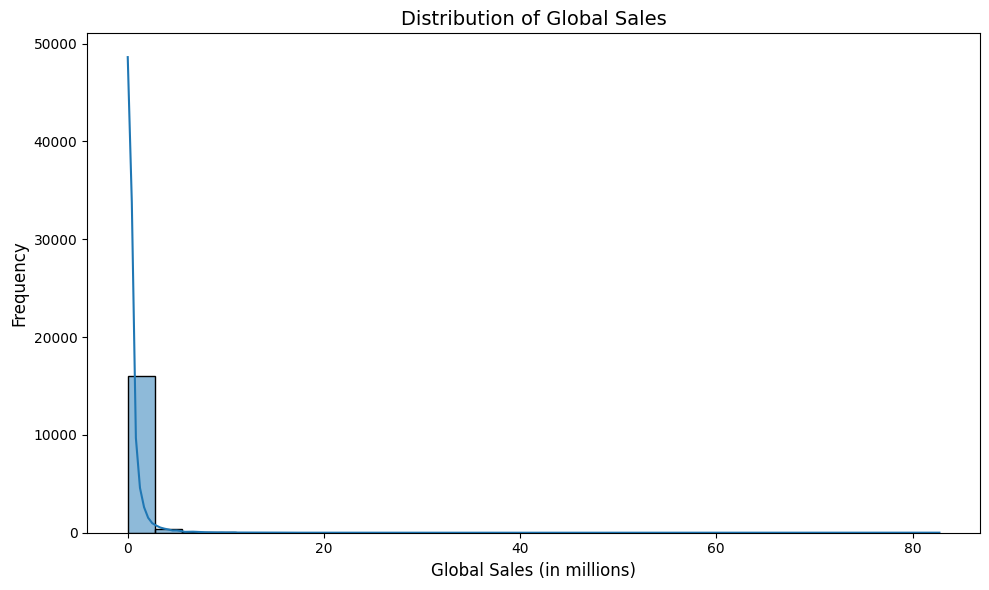

In [5]:
def plot_global_sales_distribution(df):
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Global_Sales'], bins=30, kde=True)
    plt.title('Distribution of Global Sales', fontsize=14)
    plt.xlabel('Global Sales (in millions)', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.tight_layout()
    plt.show()

plot_global_sales_distribution(df)

# Plot Games Per Year

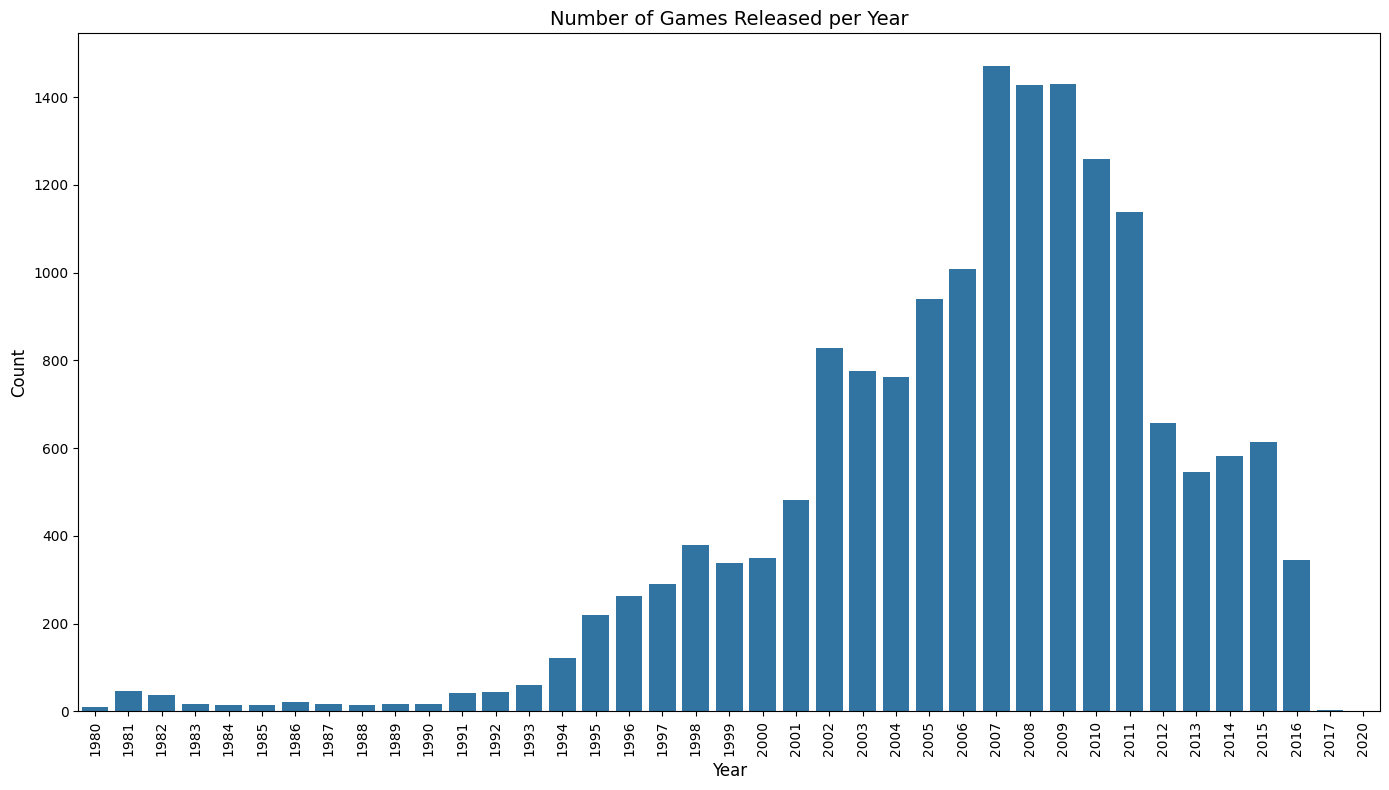

In [6]:
def plot_games_per_year(df):
    plt.figure(figsize=(14, 8))
    sns.countplot(data=df, x='Year')
    plt.title('Number of Games Released per Year', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

plot_games_per_year(df)

# Plot Sales by Genre

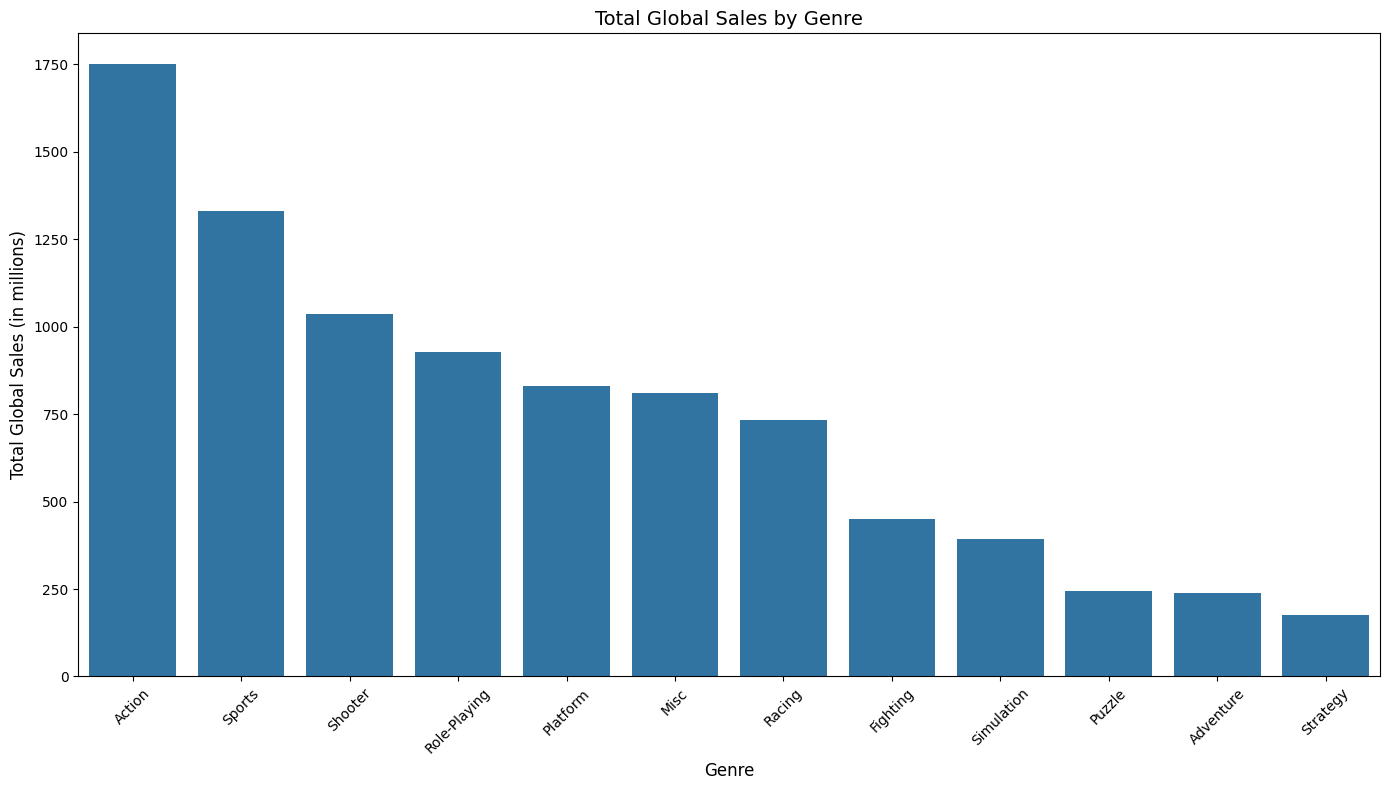

In [7]:
def plot_sales_by_genre(df):
    plt.figure(figsize=(14, 8))
    genre_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
    sns.barplot(x=genre_sales.index, y=genre_sales.values)
    plt.title('Total Global Sales by Genre', fontsize=14)
    plt.xlabel('Genre', fontsize=12)
    plt.ylabel('Total Global Sales (in millions)', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_sales_by_genre(df)

# Plot Correlation Matrix

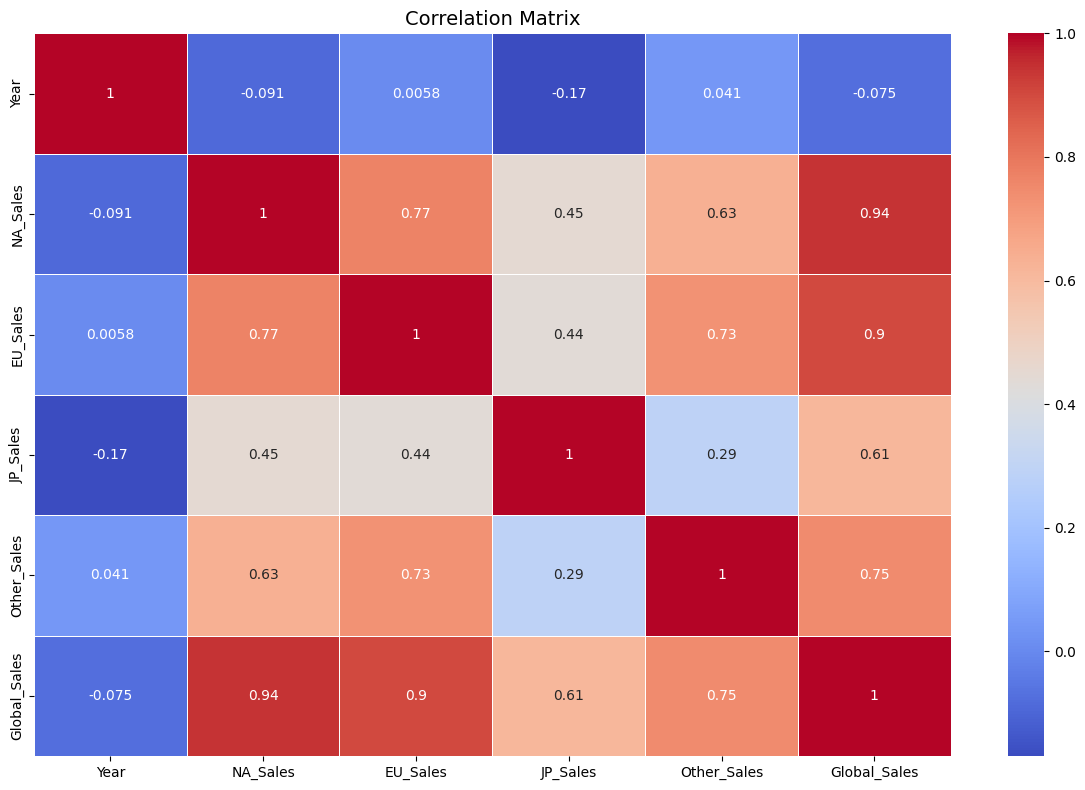

In [8]:
def plot_correlation_matrix(df):
    plt.figure(figsize=(12, 8))
    numerical_df = df.select_dtypes(include=['float64', 'int64'])
    correlation_matrix = numerical_df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Matrix', fontsize=14)
    plt.tight_layout()
    plt.show()

plot_correlation_matrix(df)

# Plot Year vs Global Sales

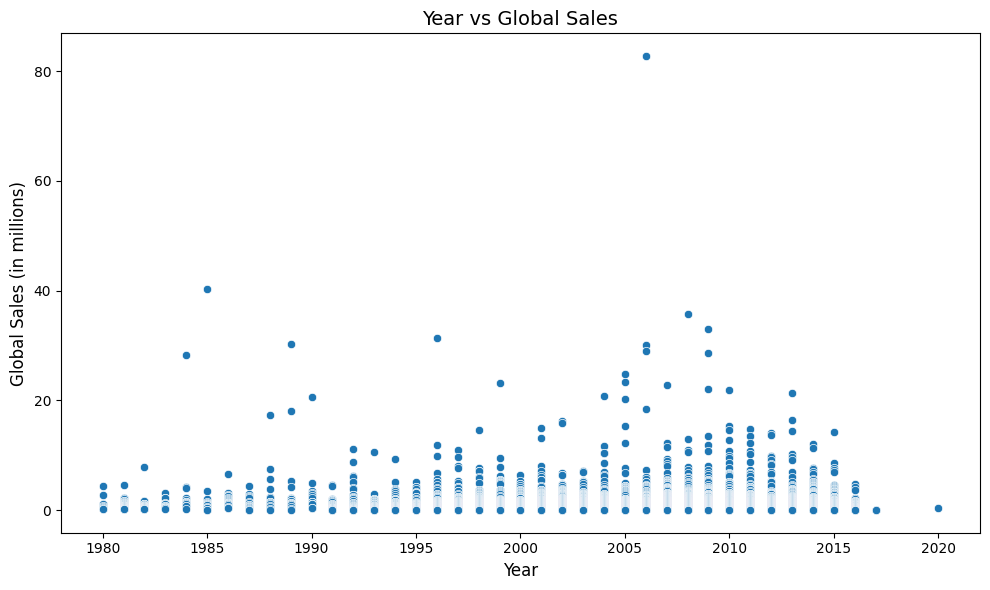

In [9]:
def plot_year_vs_global_sales(df):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='Year', y='Global_Sales')
    plt.title('Year vs Global Sales', fontsize=14)
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Global Sales (in millions)', fontsize=12)
    plt.tight_layout()
    plt.show()

plot_year_vs_global_sales(df)

# Plot Sales by Platform

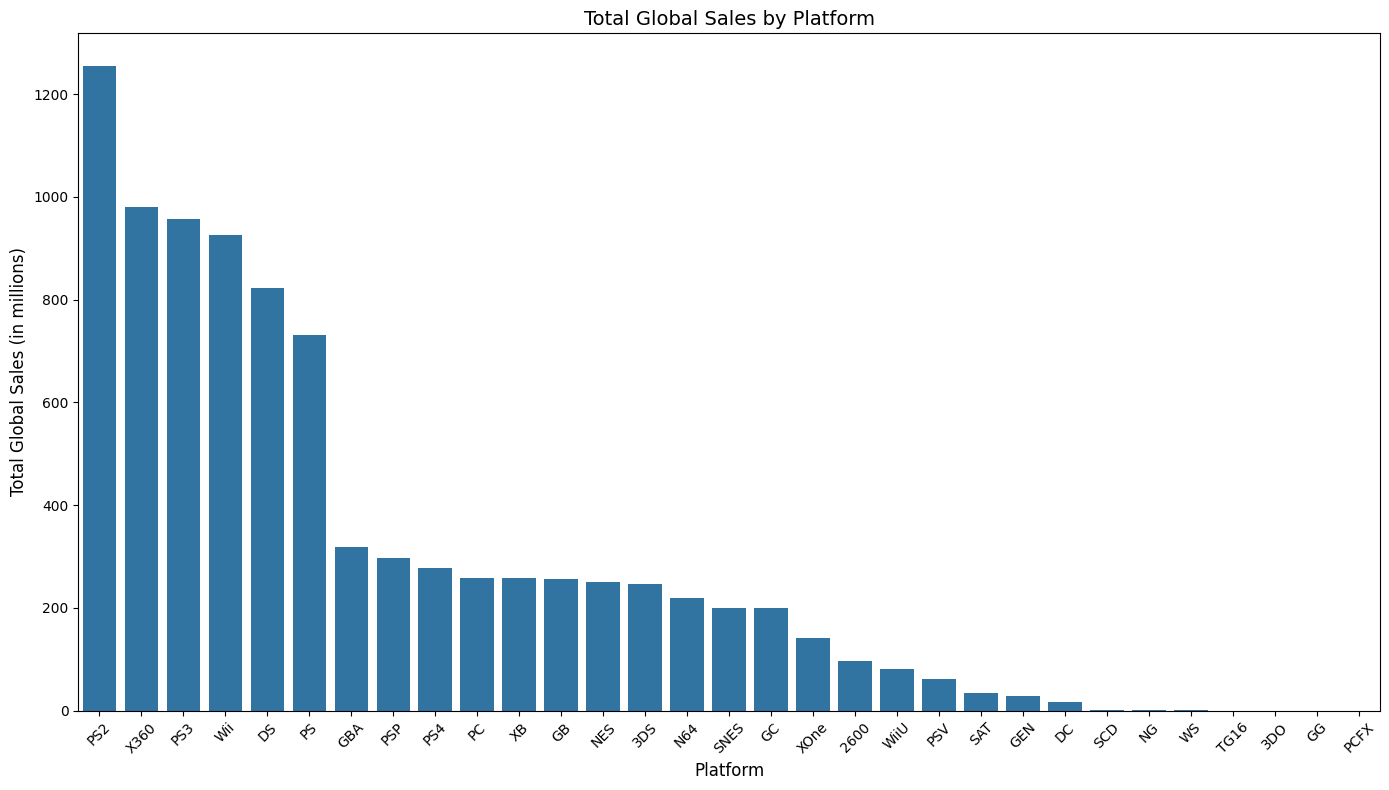

In [10]:
def plot_sales_by_platform(df):
    plt.figure(figsize=(14, 8))
    platform_sales = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)
    sns.barplot(x=platform_sales.index, y=platform_sales.values)
    plt.title('Total Global Sales by Platform', fontsize=14)
    plt.xlabel('Platform', fontsize=12)
    plt.ylabel('Total Global Sales (in millions)', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_sales_by_platform(df)

# Calculate and Print Correlations

In [11]:
def calculate_and_print_correlations(df):
    correlation_na = df['Global_Sales'].corr(df['NA_Sales'])
    correlation_eu = df['Global_Sales'].corr(df['EU_Sales'])
    correlation_jp = df['Global_Sales'].corr(df['JP_Sales'])
    correlation_other = df['Global_Sales'].corr(df['Other_Sales'])

    print(f"Correlation between Global Sales and NA Sales: {correlation_na}")
    print(f"Correlation between Global Sales and EU Sales: {correlation_eu}")
    print(f"Correlation between Global Sales and JP Sales: {correlation_jp}")
    print(f"Correlation between Global Sales and Other Sales: {correlation_other}")

calculate_and_print_correlations(df)

Correlation between Global Sales and NA Sales: 0.9410469761957092
Correlation between Global Sales and EU Sales: 0.9028352973840659
Correlation between Global Sales and JP Sales: 0.6118144566511938
Correlation between Global Sales and Other Sales: 0.7483296971939626


# Perform T-Test

In [12]:
def perform_t_test(df, platform1, platform2):
    sales_platform1 = df[df['Platform'] == platform1]['Global_Sales']
    sales_platform2 = df[df['Platform'] == platform2]['Global_Sales']
    t_stat, p_value = stats.ttest_ind(sales_platform1, sales_platform2, equal_var=False)
    print(f"T-test between {platform1} and {platform2} Global Sales: t-statistic = {t_stat}, p-value = {p_value}")

perform_t_test(df, 'PS4', 'XOne')

T-test between PS4 and XOne Global Sales: t-statistic = 1.4580792729285872, p-value = 0.14539268977819883


# Perform ANOVA Test

In [13]:
def perform_anova_test(df):
    genres = df['Genre'].unique()
    sales_by_genre = [df[df['Genre'] == genre]['Global_Sales'] for genre in genres]
    f_stat, p_value_anova = stats.f_oneway(*sales_by_genre)
    print(f"ANOVA test across different genres: F-statistic = {f_stat}, p-value = {p_value_anova}")

perform_anova_test(df)

ANOVA test across different genres: F-statistic = 18.229849736147386, p-value = 1.000359139704343e-36


# Train and Evaluate Model

In [14]:
def train_and_evaluate_model(df, config):
    features = config["features"]
    target = config["target"]
    test_size = config["test_size"]
    random_state = config["random_state"]

    X = df[features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    print("Evaluating Linear Regression model:")
    model_lr = LinearRegression()
    model_lr.fit(X_train_scaled, y_train)
    y_pred_lr = model_lr.predict(X_test_scaled)
    
    mse_lr = mean_squared_error(y_test, y_pred_lr)
    r2_lr = r2_score(y_test, y_pred_lr)
    print(f"  Mean Squared Error: {mse_lr}")
    print(f"  R-squared: {r2_lr}")

    cv_scores_lr = cross_val_score(model_lr, X_train_scaled, y_train, cv=5, scoring='r2')
    print(f"  Cross-Validation R-squared scores: {cv_scores_lr}")
    print(f"  Mean Cross-Validation R-squared score: {cv_scores_lr.mean()}")
    
    mae_lr = mean_absolute_error(y_test, y_pred_lr)
    rmse_lr = np.sqrt(mse_lr)
    print(f"  Mean Absolute Error: {mae_lr}")
    print(f"  Root Mean Squared Error: {rmse_lr}")
    
    print("\nEvaluating Gradient Boosting Regressor model:")
    model_gbr = GradientBoostingRegressor(random_state=random_state)

    param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 4, 5],
        'min_samples_split': [2, 4, 6],
        'min_samples_leaf': [1, 2, 3],
    }
    
    gbr_grid_search = GridSearchCV(estimator=model_gbr, param_grid=param_grid, cv=5, scoring='r2')
    gbr_grid_search.fit(X_train_scaled, y_train)
    
    best_gbr_model = gbr_grid_search.best_estimator_
    
    y_pred_gbr = best_gbr_model.predict(X_test_scaled)
    
    mse_gbr = mean_squared_error(y_test, y_pred_gbr)
    r2_gbr = r2_score(y_test, y_pred_gbr)
    
    print(f"  Best Gradient Boosting Regressor params are: {gbr_grid_search.best_params_}")
    print(f"  Mean Squared Error: {mse_gbr}")
    print(f"  R-squared: {r2_gbr}")

    cv_scores_gbr = cross_val_score(best_gbr_model, X_train_scaled, y_train, cv=5, scoring='r2')
    print(f"  Cross-Validation R-squared scores: {cv_scores_gbr}")
    print(f"  Mean Cross-Validation R-squared score: {cv_scores_gbr.mean()}")
    
    mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
    rmse_gbr = np.sqrt(mse_gbr)
    print(f"  Mean Absolute Error: {mae_gbr}")
    print(f"  Root Mean Squared Error: {rmse_gbr}")
    
    with open(config["model_output_path"], 'wb') as model_file:
        pickle.dump(best_gbr_model, model_file)
    
    with open(config["scaler_output_path"], 'wb') as scaler_file:
        pickle.dump(scaler, scaler_file)

train_and_evaluate_model(df, CONFIG)

Evaluating Linear Regression model:
  Mean Squared Error: 2.844408635605813e-05
  R-squared: 0.9999932288161819
  Cross-Validation R-squared scores: [0.99997953 0.99998551 0.99998277 0.99998691 0.99999102]
  Mean Cross-Validation R-squared score: 0.9999851480837443
  Mean Absolute Error: 0.0030450893716364885
  Root Mean Squared Error: 0.0053332997624414595

Evaluating Gradient Boosting Regressor model:
  Best Gradient Boosting Regressor params are: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 300}
  Mean Squared Error: 0.5951669170019381
  R-squared: 0.8583190703678243
  Cross-Validation R-squared scores: [0.98481453 0.99251642 0.98259298 0.97601873 0.93028503]
  Mean Cross-Validation R-squared score: 0.9732455400276813
  Mean Absolute Error: 0.03772286088138992
  Root Mean Squared Error: 0.7714706196621736
